### ** 해석과 판단의 이유를 모두 상세하게 적어주세요 **


In [1]:
%matplotlib inline 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

# Data 

데이터 출처 : https://www.kaggle.com/avikasliwal/used-cars-price-prediction 

< y > 
* **Price** : The price of the used car in INR Lakhs.



< X > 
* Name : The brand and model of the car
* Location : The location in which the car is being sold or is available for purchase.
* Year : The year or edition of the model.
* Kilometers_Driven : The total kilometres driven in the car by the previous owner(s) in KM.
* Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
* Transmission : The type of transmission used by the car. (Automatic / Manual)
* Owner_Type : Whether the ownership is Firsthand, Second hand or other.
* Mileage : The standard mileage offered by the car company in kmpl or km/kg
* Engine : The displacement volume of the engine in CC.
* Power : The maximum power of the engine in bhp.
* Seats : The number of seats in the car.
* New_Price : The price of a new car of the same model.

In [2]:
# Load Data 
data = pd.read_csv("assignment2_data.csv")
data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [3]:
# 결측치 확인
data.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [4]:
data.describe()

,Unnamed: 0,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,3009.000000,2013.358199,5.873838e+04,5.278735,9.479468
std,1737.679967,3.269742,9.126884e+04,0.808840,11.187917
min,0.000000,1998.000000,1.710000e+02,0.000000,0.440000
25%,1504.500000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3009.000000,2014.000000,5.300000e+04,5.000000,5.640000
75%,4513.500000,2016.000000,7.300000e+04,5.000000,9.950000
max,6018.000000,2019.000000,6.500000e+06,10.000000,160.000000


In [5]:
data.describe(include = "object")

,Name,Location,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,New_Price
count,6019,6019,6019,6019,6019,6017,5983,5983,824
unique,1876,11,5,2,4,442,146,372,540
top,Mahindra XUV500 W8 2WD,Mumbai,Diesel,Manual,First,18.9 kmpl,1197 CC,74 bhp,95.13 Lakh
freq,49,790,3205,4299,4929,172,606,235,6


In [6]:
# 결측치 - Mileage
data[data['Mileage'].isnull()]

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
4446,4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72 CC,41 bhp,5.0,13.58 Lakh,13.00
4904,4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798 CC,73 bhp,5.0,NaN,12.75


In [7]:
# Mileage는 모델명마다 동일함 -> 결측치의 해당모델과 모델명이 일치하는 행을 찾아 결측치를 매꾸기 위한 탐색
pd.concat([data[data['Name']=='Mahindra E Verito D4'],data[data['Name']=='Toyota Prius 2009-2016 Z4']])

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
4446,4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72 CC,41 bhp,5.0,13.58 Lakh,13.00
4904,4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798 CC,73 bhp,5.0,NaN,12.75


In [8]:
# Mileage에 결측치를 갖고 있는 모델명이 유일함으로 대체 불가능-> 삭제
data.drop([data.index[4446],data.index[4904]], inplace= True)
data = data.reset_index()
del data['index']

In [9]:
del data['Unnamed: 0']

In [10]:
# 결측치 - Engine, Power ... 총 표본수가 36개이므로 그냥 드롭하도록 한다..
data[data['Engine'].isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN,NaN,2.95
208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN,NaN,2.11
733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.1 kmpl,NaN,NaN,NaN,NaN,1.75
749,Land Rover Range Rover 3.0 D,Mumbai,2008,55001,Diesel,Automatic,Second,0.0 kmpl,NaN,NaN,NaN,NaN,26.50
1294,Honda City 1.3 DX,Delhi,2009,55005,Petrol,Manual,First,12.8 kmpl,NaN,NaN,NaN,NaN,3.20
1327,Maruti Swift 1.3 ZXI,Hyderabad,2015,50295,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN,NaN,5.80
1385,Honda City 1.5 GXI,Pune,2004,115000,Petrol,Manual,Second,0.0 kmpl,NaN,NaN,NaN,NaN,1.50
1460,Land Rover Range Rover Sport 2005 2012 Sport,Coimbatore,2008,69078,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN,NaN,40.88
2074,Maruti Swift 1.3 LXI,Pune,2011,24255,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN,NaN,3.15
2096,Hyundai Santro LP zipPlus,Coimbatore,2004,52146,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN,NaN,1.93


In [11]:
del data['New_Price']
data

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6012,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,4.75
6013,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,4.00
6014,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,2.90
6015,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65


In [12]:
data.dropna(axis = 0 , how = 'any',subset =['Engine','Power', 'Seats'],inplace = True)
data

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6012,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,4.75
6013,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,4.00
6014,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,2.90
6015,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65


In [13]:
# [Mileage, Engine, Power]의 type을 object -> numeric으로 변경
data['Mileage'] = data['Mileage'].apply(lambda x : x.split()[0])
data['Engine'] = data['Engine'].apply(lambda x : x.split()[0])
data['Power'] = data['Power'].apply(lambda x : x.split()[0])

In [17]:
data['Mileage'] = pd.to_numeric(data['Mileage'], errors='coerce')
data['Engine'] = pd.to_numeric(data['Engine'], errors='coerce')
data['Power'] = pd.to_numeric(data['Power'], errors='coerce')

In [20]:
data.isnull().sum()

Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                0
Engine                 0
Power                103
Seats                  0
Price                  0
dtype: int64

In [36]:
data[data['Power'].isnull()]['Engine']

76      1399
79      1086
89      1086
120     1086
143     1086
        ... 
5859    1086
5871    1086
5923    1798
5941    2112
5983    1364
Name: Engine, Length: 103, dtype: int64

In [28]:
data[data['Engine']==1086].

Year                  2009.416667
Kilometers_Driven    65714.425926
Mileage                 14.970463
Engine                1086.000000
Power                   65.702055
Seats                    5.000000
Price                    2.134444
dtype: float64

In [40]:
data.groupby('Engine').apply(lambda g:g.fillna(g.mean()))

Name    Location  Year  \
Engine                                                                 
624    41                          Tata Nano LX SE       Kochi  2014   
       112                      Tata Nano Twist XT   Bangalore  2014   
       124                           Tata Nano XTA  Coimbatore  2017   
       523                      Tata Nano Twist XT   Ahmedabad  2014   
       740                           Tata Nano XTA  Coimbatore  2016   
...                                            ...         ...   ...   
5204   5779             Lamborghini Gallardo Coupe       Delhi  2011   
5461   152   Mercedes-Benz S Class 2005 2013 S 500     Kolkata  2010   
       4690         Mercedes-Benz SLK-Class 55 AMG   Bangalore  2014   
       4721          Mercedes-Benz SL-Class SL 500     Kolkata  2010   
5998   5519        Bentley Continental Flying Spur   Hyderabad  2006   

             Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage  \
Engine                                                                      
624    41                19698    Petrol       Manual      First    25.40   
       112               25500    Petrol       Manual      First    25.40   
       124               32684    Petrol    Automatic      First    21.90   
       523               18000    Petrol       Manual     Second    25.40   
       740               24941    Petrol    Automatic      First    21.90   
...                        ...       ...          ...        ...      ...   
5204   5779               6500    Petrol    Automatic      Third     6.40   
5461   152               35277    Petrol    Automatic      First     7.81   
       4690               3000    Petrol    Automatic     Second    12.00   
       4721              35000    Petrol    Automatic      First     8.10   
5998   5519              48000    Petrol    Automatic      First     8.60   

             Engine   Power  Seats   Price  
Engine                                      
624    41       624   37.50    4.0    1.53  
       112      624   37.50    4.0    2.15  
       124      624   37.48    4.0    3.23  
       523      624   37.50    4.0    1.00  
       740      624   37.48    4.0    3.19  
...             ...     ...    ...     ...  
5204   5779    5204  560.00    2.0  120.00  
5461   152     5461  362.90    5.0   30.00  
       4690    5461  421.00    2.0   90.00  
       4721    5461  387.30    2.0   29.50  
5998   5519    5998  552.00    4.0   59.00  

[5975 rows x 12 columns]

In [41]:
data.dropna(axis = 0 , how = 'any',subset =['Power'],inplace = True)
data.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [42]:
data

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,140.80,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6012,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.40,1248,74.00,5.0,4.75
6013,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120,71.00,5.0,4.00
6014,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498,112.00,8.0,2.90
6015,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.90,998,67.10,5.0,2.65


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5872 entries, 0 to 6016
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5872 non-null   object 
 1   Location           5872 non-null   object 
 2   Year               5872 non-null   int64  
 3   Kilometers_Driven  5872 non-null   int64  
 4   Fuel_Type          5872 non-null   object 
 5   Transmission       5872 non-null   object 
 6   Owner_Type         5872 non-null   object 
 7   Mileage            5872 non-null   float64
 8   Engine             5872 non-null   int64  
 9   Power              5872 non-null   float64
 10  Seats              5872 non-null   float64
 11  Price              5872 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 596.4+ KB


In [79]:
category_col = []
numerical_col = []
for column in data.columns:
    if data[column].dtype == object:
        category_col.append(column)
    else :
        numerical_col.append(column)
        
print("Category_col : ",category_col)
print("Numerical_col : ",numerical_col)

Category_col :  ['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type']
Numerical_col :  ['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']


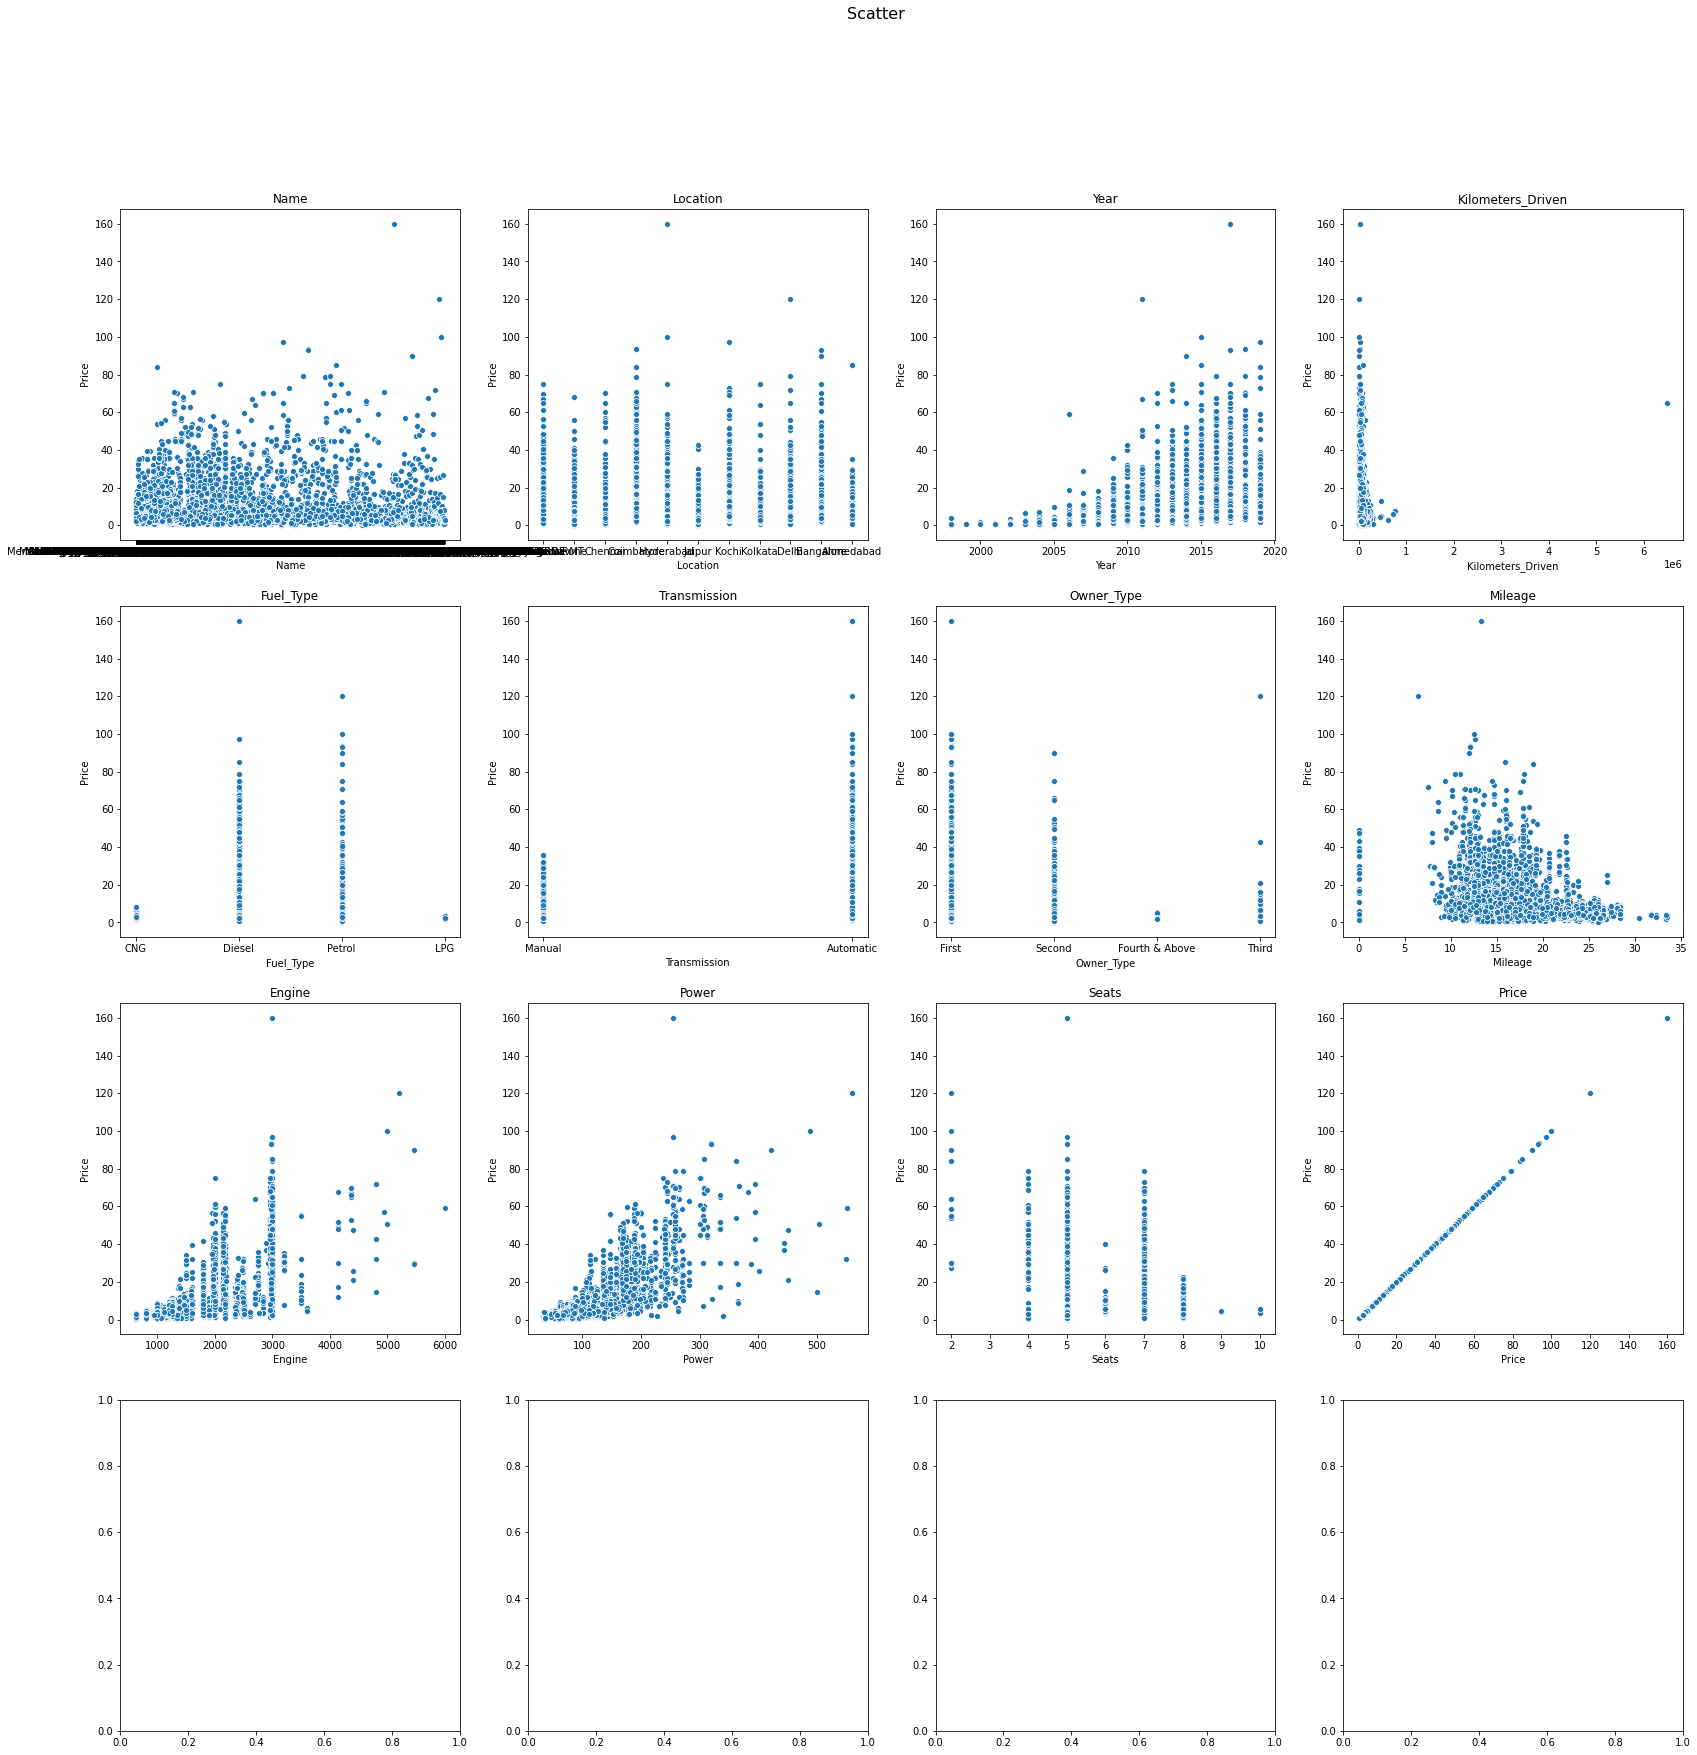

In [55]:
# outlier 제거를 위한 시각화
fig, ax = plt.subplots(3,4 , figsize=(28, 28))
ax = ax.flatten()
fig.suptitle('Scatter', fontsize=16)

for i in range(len(data.columns)):
    sns.scatterplot(x= data[data.columns[i]], y = data['Price'], ax = ax[i])
    ax[i].set(title = data.columns[i])
  
        
# plt.show()for column in data.columns:
#     plt.scatter(data['Engine'], data['Price'])

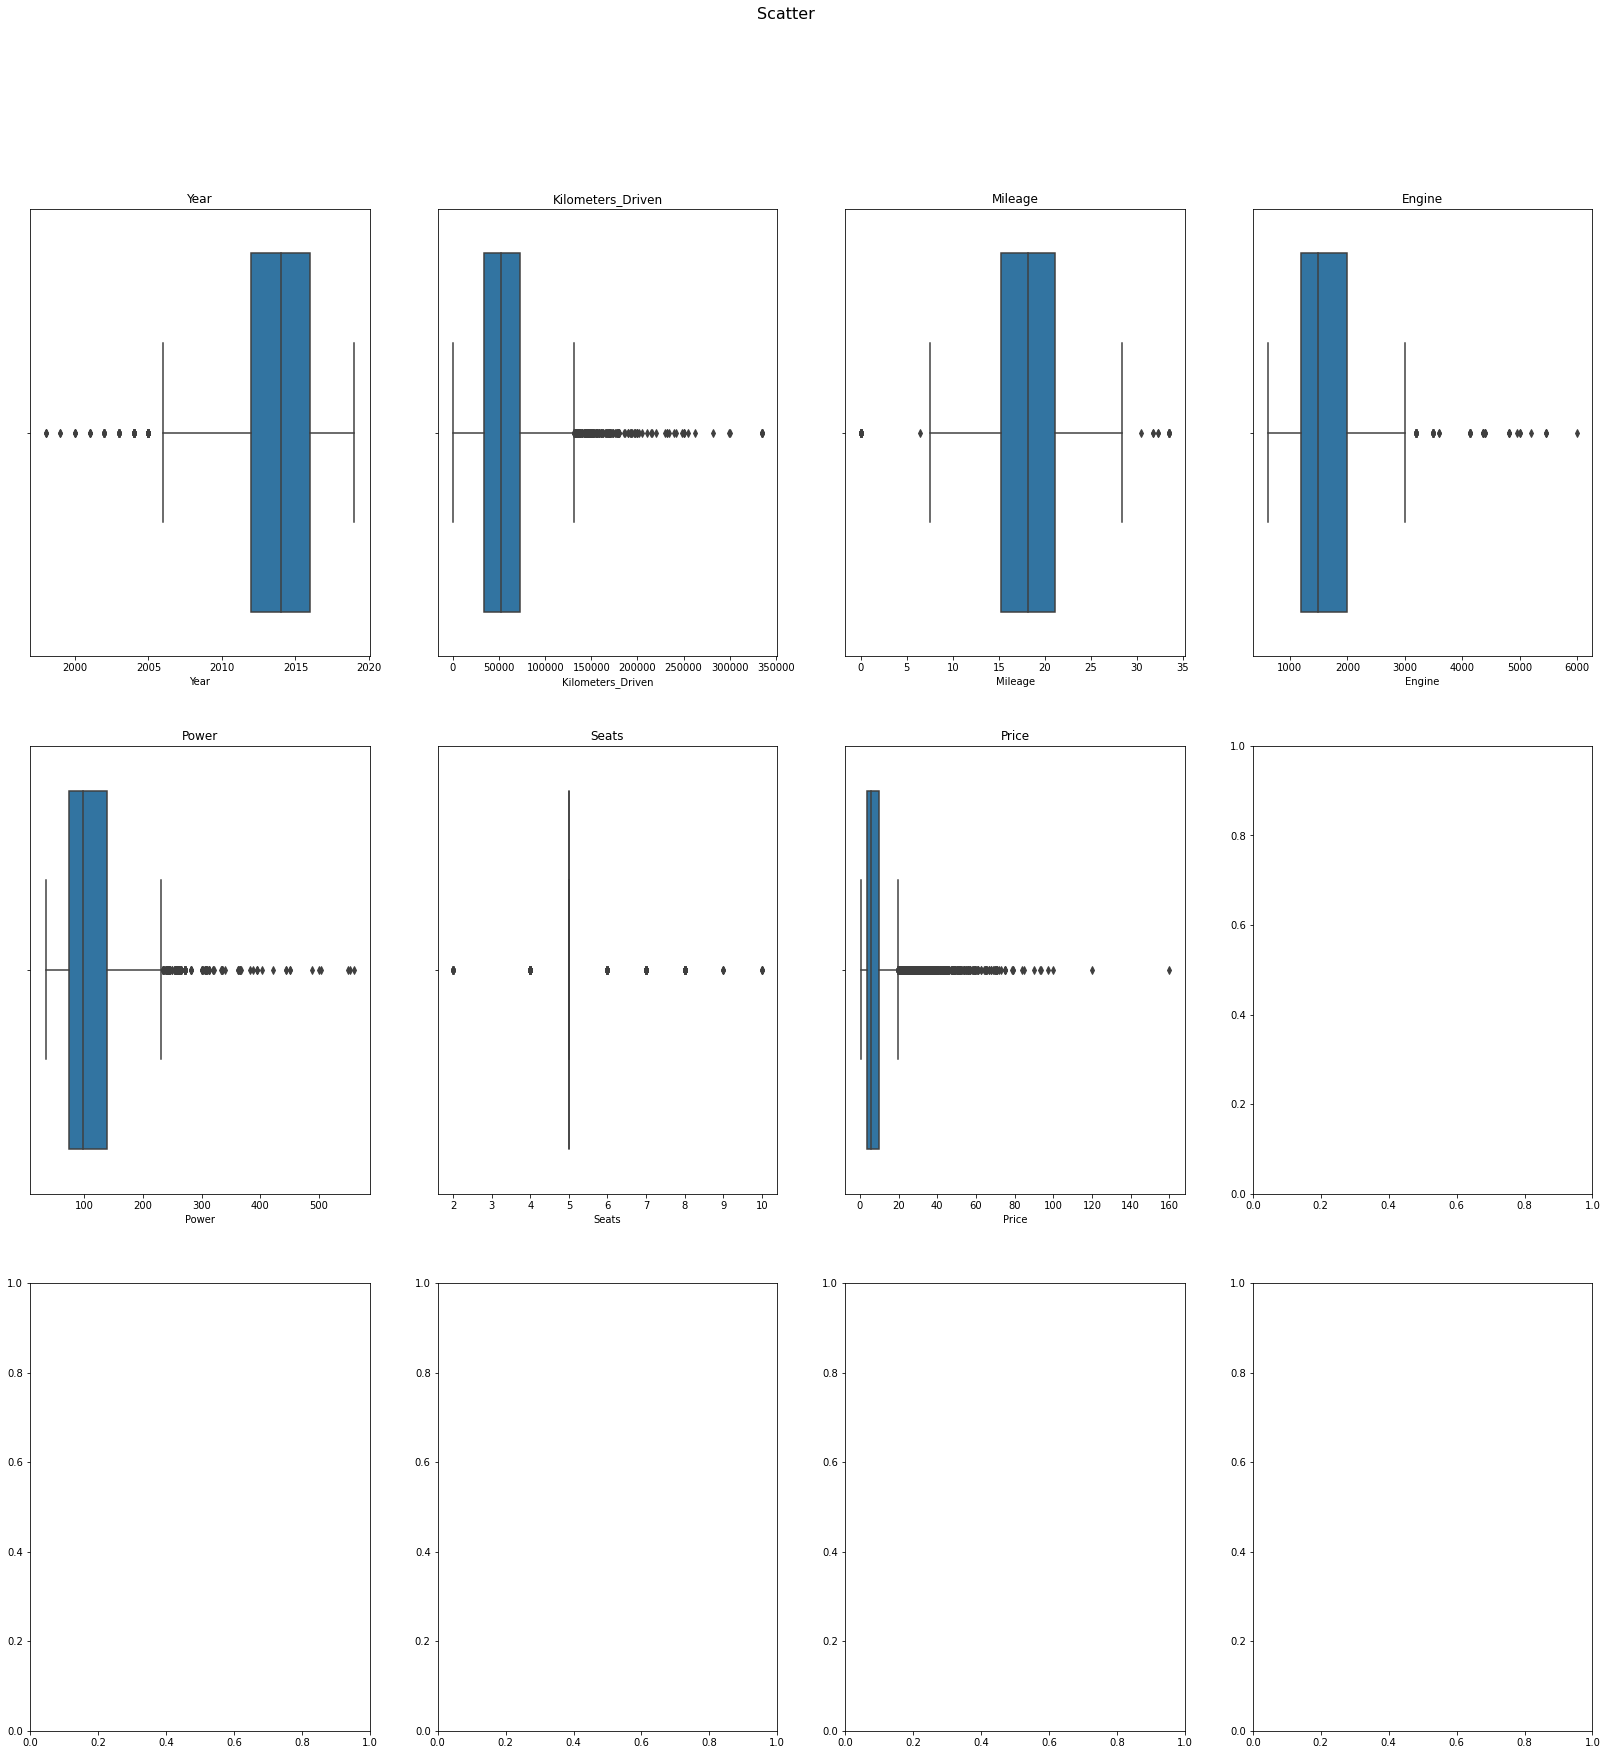

In [82]:
# outlier 제거를 위한 시각화
fig, ax = plt.subplots(3,4 , figsize=(28, 28))
ax = ax.flatten()
fig.suptitle('Scatter', fontsize=16)

for i in range(len(numerical_col)):
    sns.boxplot(data[numerical_col[i]], ax =ax[i])
#     sns.countplot(x= data.columns[i],data= data, ax = ax[i]).set(xlabel=None)
    ax[i].set(title = numerical_col[i])
  
        
# plt.show()for column in data.columns:
#     plt.scatter(data['Engine'], data['Price'])

In [ ]:
y = data['Price']
data.drop('Price', axis =1 , inplace= True)
X = data
print(X.head())
print(y.head())

In [59]:
upper_limit = data['Kilometers_Driven'].mean() + 3*data['Kilometers_Driven'].std()
lower_limit = data['Kilometers_Driven'].mean() - 3*data['Kilometers_Driven'].std()

In [60]:
print(upper_limit, lower_limit)

334825.22916504944 -218191.2308680467


In [61]:
data['Kilometers_Driven'].std()

92169.41000551602

In [62]:
data['Kilometers_Driven'].mean()

58316.99914850136

In [63]:
data['Kilometers_Driven'] = np.where(
    data['Kilometers_Driven']>upper_limit,
    upper_limit,
    np.where(
        data['Kilometers_Driven']<lower_limit,
        lower_limit,
        data['Kilometers_Driven']
    )
)

<AxesSubplot:xlabel='Kilometers_Driven'>

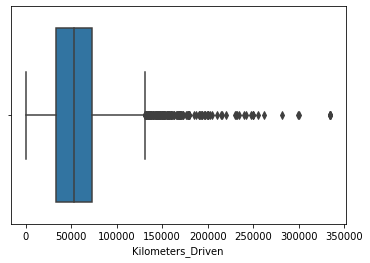

In [77]:
sns.boxplot(data['Kilometers_Driven'])


In [69]:
def outlier_treatment(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3-Q1
    lower_range = Q1 -(1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

In [70]:
lowerbound,upperbound = outlier_treatment(data.Kilometers_Driven)


In [71]:
data[(data.Kilometers_Driven<lowerbound)|(data.Kilometers_Driven>upperbound)]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
29,Toyota Innova 2.5 V Diesel 7-seater,Mumbai,2007,262000.0,Diesel,Manual,Fourth & Above,12.8,2494,102.00,7.0,4.00
64,Tata Indica V2 eLS,Chennai,2016,178000.0,Diesel,Manual,First,25.0,1396,69.00,5.0,2.50
77,Toyota Innova 2.0 G1,Chennai,2006,230000.0,Petrol,Manual,Third,12.4,1998,132.00,8.0,4.50
154,Skoda Superb Elegance 2.0 TDI CR AT,Pune,2012,136997.0,Diesel,Automatic,First,17.2,1968,138.10,5.0,8.50
164,Ford Ecosport 1.5 DV5 MT Ambiente,Kochi,2014,147898.0,Diesel,Manual,First,22.7,1498,89.84,5.0,4.42
...,...,...,...,...,...,...,...,...,...,...,...,...
5850,Toyota Innova 2.5 G4 Diesel 8-seater,Chennai,2008,192000.0,Diesel,Manual,First,12.8,2494,102.00,8.0,6.85
5869,Ford Endeavour 4x2 XLT Limited Edition,Pune,2009,180000.0,Diesel,Manual,First,10.9,2499,143.00,7.0,7.50
5912,Skoda Octavia Elegance 1.9 TDI,Hyderabad,2003,132000.0,Diesel,Manual,First,18.7,1896,66.00,5.0,2.25
5951,Ford Figo Diesel EXI,Jaipur,2012,140000.0,Diesel,Manual,First,20.0,1399,68.00,5.0,2.51


In [72]:
lowerbound

-25047.875

In [73]:
upperbound

130873.125